<a href="https://colab.research.google.com/github/hayakzan/MLP-notations/blob/main/MLP_notations_TRAINING_PREDICTING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Before running the code: 

#### - Upload the notation fonts `/fonts/OpusStd.ttf` and `/fonts/OpusSpecialStd.ttf` into `/content` folder

#### - Upload /xydata/predict_xy.json


In [2]:
# -*- coding: utf-8 -*-

# dependencies
from __future__ import division
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import random
from matplotlib.lines import Line2D
from scipy import interpolate
import csv
import pandas as pd
import json

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
from google.colab import drive
import shutil

global fig_num
fig_num = 1

# mount Google Drive
drive.mount('/content/drive')

# path to the source file
source_file_path_1 = '/content/drive/MyDrive/train_xy.json'
source_file_path_2 = '/content/drive/MyDrive/slider_values.json'

# destination directory in Colab notebook
destination_directory = '/content'

shutil.copy(source_file_path_1, destination_directory)
shutil.copy(source_file_path_2, destination_directory)


Mounted at /content/drive


'/content/slider_values.json'

In [4]:
# fix the format
with open("train_xy.json", "r") as file:
    data = json.load(file)

x_values = data["x"]
y_values = data["y"]

output = []
for x, y in zip(x_values, y_values):
    output.append({"x": x, "y": y})

with open("train_xy.json", "w") as file:
    json.dump(output, file, indent=4)


In [5]:
# Extract the xy training values 
with open("train_xy.json", "r") as file:
    coordinates_data = json.load(file)

x_values = [item["x"] for item in coordinates_data]
y_values = [item["y"] for item in coordinates_data]
input_features = np.array(list(zip(x_values, y_values)))

with open("slider_values.json", "r") as file:
    slider_values_data = json.load(file)

output_features = np.array([list(item.values()) for item in slider_values_data])

print("Input Features:")
print(input_features)
print("\nOutput Features:")
print(output_features)


Input Features:
[[0.01310484 0.03030303]
 [0.09677419 0.43344156]
 [0.30342742 0.33198052]
 [0.38608871 0.495671  ]
 [0.73084677 0.30357143]
 [0.66935484 0.59442641]
 [0.7046371  0.91369048]
 [0.90322581 0.77299784]
 [0.9858871  0.97997835]]

Output Features:
[[1.0e+00 8.0e+00 0.0e+00 1.2e+01 2.5e-01 0.0e+00 0.0e+00]
 [8.0e-02 5.0e+00 7.0e+00 1.9e+01 1.0e-01 5.0e-01 9.4e-01]
 [7.0e-01 3.0e+00 0.0e+00 1.9e+01 8.2e-01 1.0e-02 8.6e-01]
 [5.5e-01 5.0e+00 3.0e+00 1.0e+01 2.3e-01 2.7e-01 8.4e-01]
 [3.3e-01 2.0e+00 8.0e+00 2.0e+01 3.2e-01 8.0e-01 2.8e-01]
 [2.6e-01 7.0e+00 1.0e+00 1.9e+01 6.6e-01 4.8e-01 4.6e-01]
 [2.0e-02 2.0e+00 8.0e+00 1.9e+01 1.5e-01 3.9e-01 5.2e-01]
 [4.0e-02 7.0e+00 5.0e+00 1.3e+01 4.0e-01 1.2e-01 5.3e-01]
 [4.0e-01 1.0e+00 7.0e+00 2.0e+01 5.6e-01 5.7e-01 2.5e-01]]


#### Train the MLP

In [6]:
# define and compile the MLP model
model = Sequential()
model.add(Dense(10, input_dim=2, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(7, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam')

# train the model
model.fit(input_features, output_features, epochs=1000, batch_size=32)


Epoch 1/1000
1/1 [==============================] - 6s 6s/step - loss: 49.9307
Epoch 2/1000
1/1 [==============================] - 0s 9ms/step - loss: 49.9014
Epoch 3/1000
1/1 [==============================] - 0s 8ms/step - loss: 49.8709
Epoch 4/1000
1/1 [==============================] - 0s 8ms/step - loss: 49.8398
Epoch 5/1000
1/1 [==============================] - 0s 8ms/step - loss: 49.8086
Epoch 6/1000
1/1 [==============================] - 0s 8ms/step - loss: 49.7774
Epoch 7/1000
1/1 [==============================] - 0s 8ms/step - loss: 49.7462
Epoch 8/1000
1/1 [==============================] - 0s 8ms/step - loss: 49.7150
Epoch 9/1000
1/1 [==============================] - 0s 8ms/step - loss: 49.6825
Epoch 10/1000
1/1 [==============================] - 0s 7ms/step - loss: 49.6482
Epoch 11/1000
1/1 [==============================] - 0s 8ms/step - loss: 49.6136
Epoch 12/1000
1/1 [==============================] - 0s 8ms/step - loss: 49.5780
Epoch 13/1000
1/1 [===================

In [7]:
# fix the format for predict
with open("predict_xy.json", "r") as file:
    data = json.load(file)

x_values = data["x"]
y_values = data["y"]

output = []
for x, y in zip(x_values, y_values):
    output.append({"x": x, "y": y})

with open("predict_xy.json", "w") as file:
    json.dump(output, file, indent=4)



In [8]:
# read/extract the provided input for prediction
with open("predict_xy.json", "r") as file:
    predict_xy = json.load(file)

x_values = [item["x"] for item in predict_xy]
y_values = [item["y"] for item in predict_xy]
input_features = np.array(list(zip(x_values, y_values)))

print("\nPrediction Features:")
print(input_features)



Prediction Features:
[[0.06350806 0.14123377]
 [0.22076613 0.60795455]
 [0.41733871 0.21969697]
 [0.63306452 0.58630952]
 [0.36693548 0.90692641]
 [0.80040323 0.33739177]
 [0.96975806 0.6525974 ]
 [0.09677419 0.69047619]
 [0.59879032 0.15611472]]


In [9]:
# predict

import numpy as np

slider_values = []

for pair in input_features:
    input_data = np.array([pair])
    predicted_output = model.predict(input_data)
    predicted_output_values = predicted_output.flatten().tolist()  
    
    print("Predicted Output:")
    print(predicted_output_values)

    slider_values.append(predicted_output_values)

print('slider_values: ', slider_values) 



1/1 [==============================] - 0s 82ms/step
Predicted Output:
[0.611579179763794, 4.0847673416137695, 3.2448995113372803, 14.205348014831543, 0.3083425760269165, 0.1609807312488556, 0.5867531299591064]
1/1 [==============================] - 0s 24ms/step
Predicted Output:
[0.529782772064209, 4.397488117218018, 4.167544364929199, 16.57643699645996, 0.3703785538673401, 0.2893601655960083, 0.6885722875595093]
1/1 [==============================] - 0s 23ms/step
Predicted Output:
[0.4327671527862549, 4.140241622924805, 3.7856295108795166, 15.171273231506348, 0.34764260053634644, 0.325383722782135, 0.5452837944030762]
1/1 [==============================] - 0s 19ms/step
Predicted Output:
[0.31475019454956055, 4.328465938568115, 4.618500232696533, 17.002164840698242, 0.39776813983917236, 0.3896256685256958, 0.5062402486801147]
1/1 [==============================] - 0s 19ms/step
Predicted Output:
[0.44908154010772705, 4.5550384521484375, 4.811737060546875, 18.032154083251953, 0.409131169

#### Generate new notations with predictions

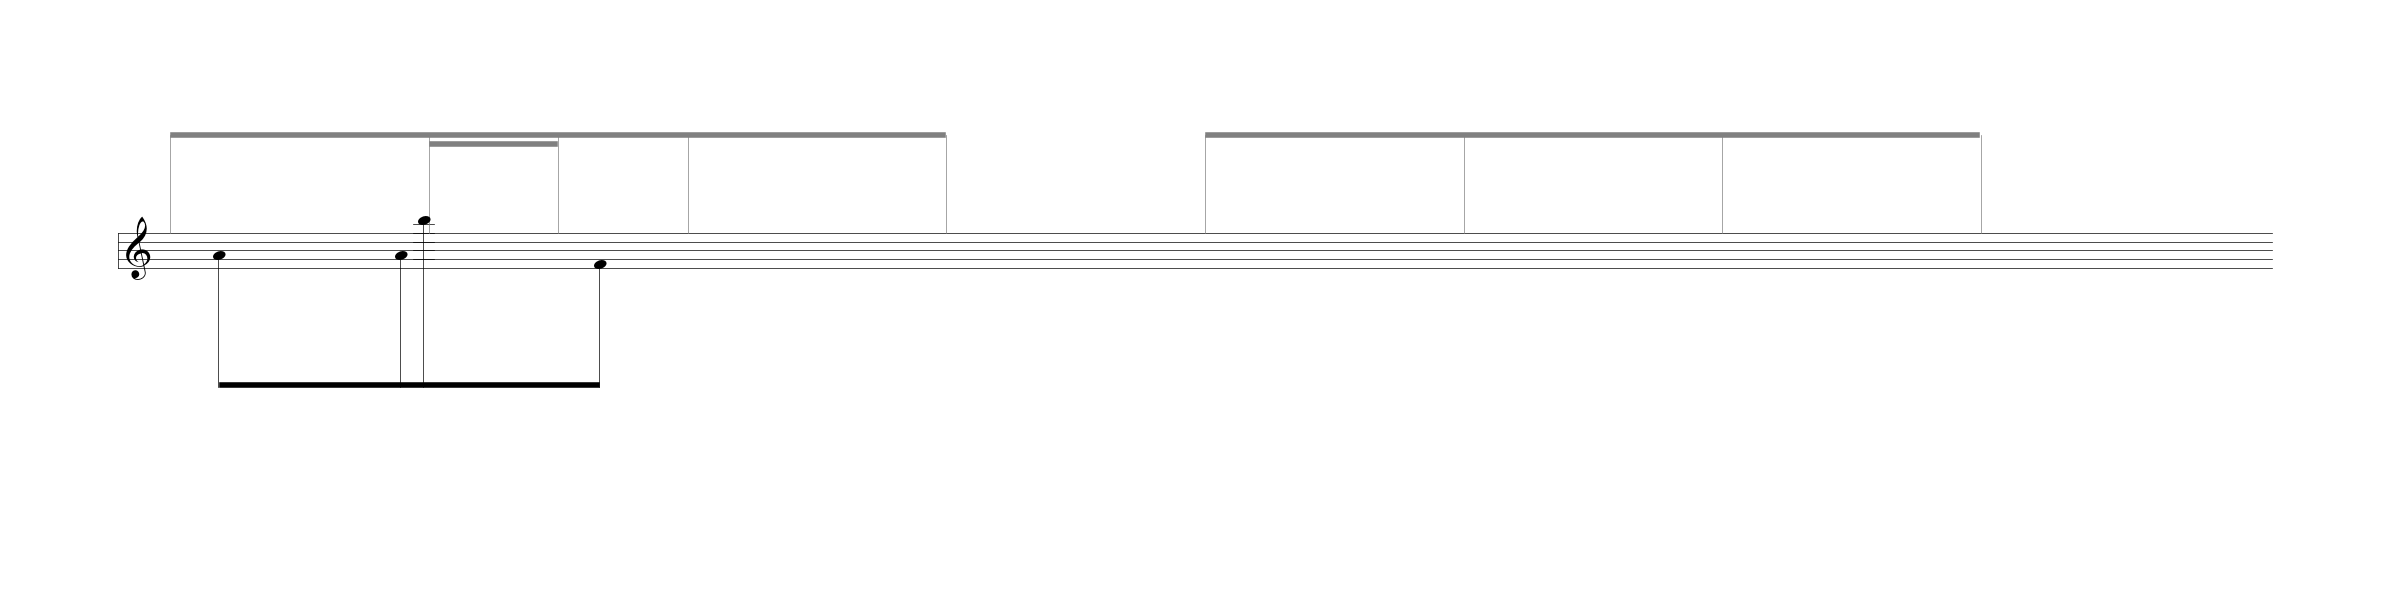

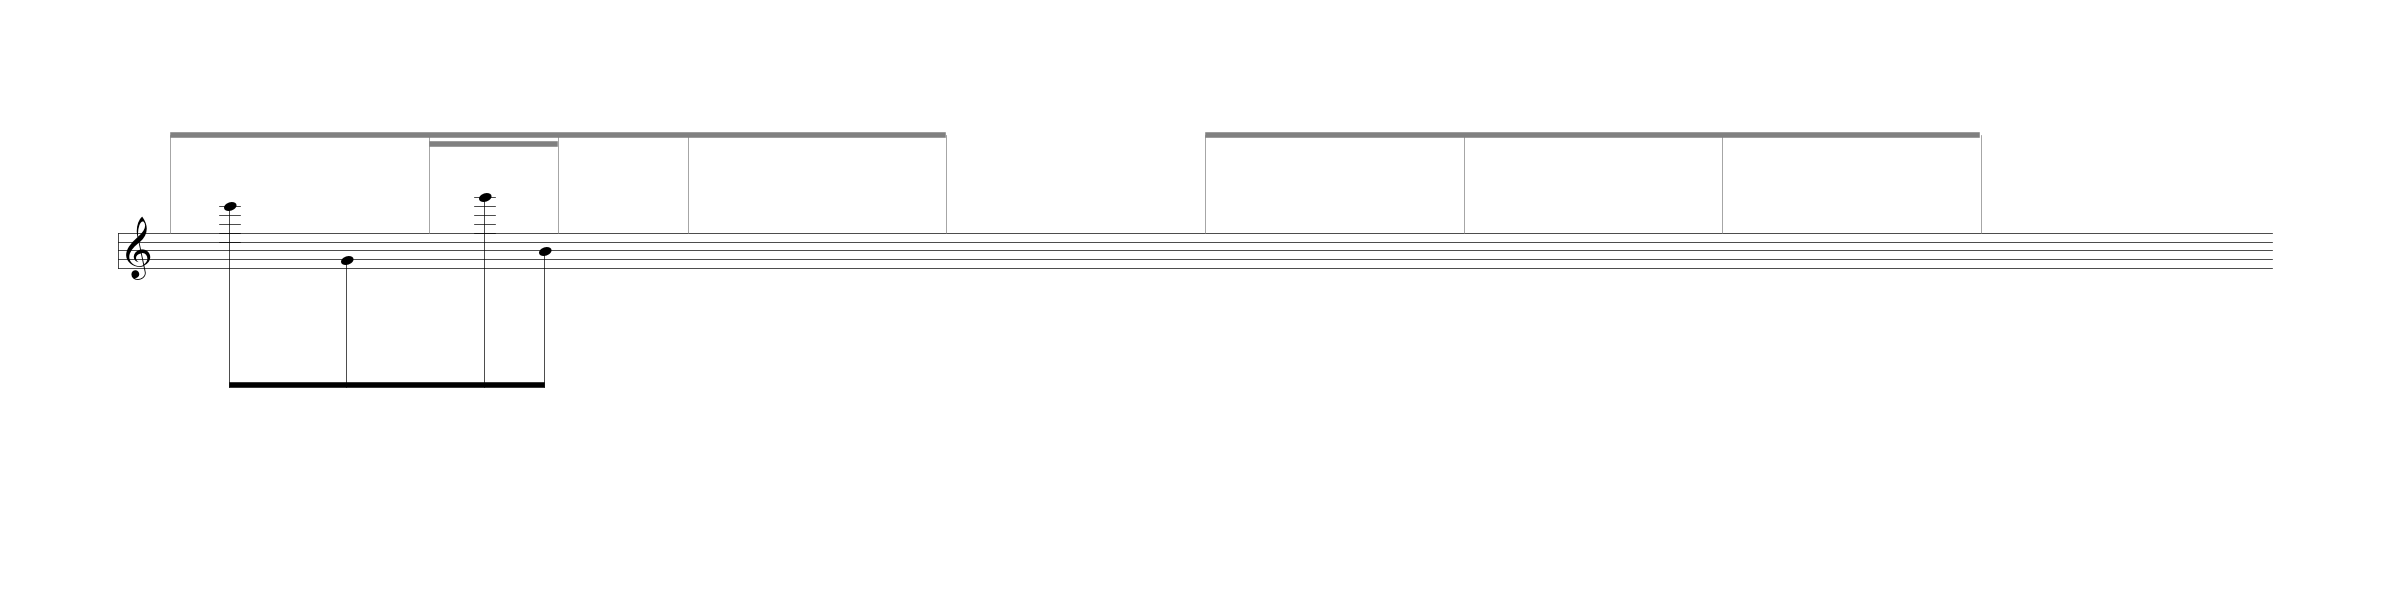

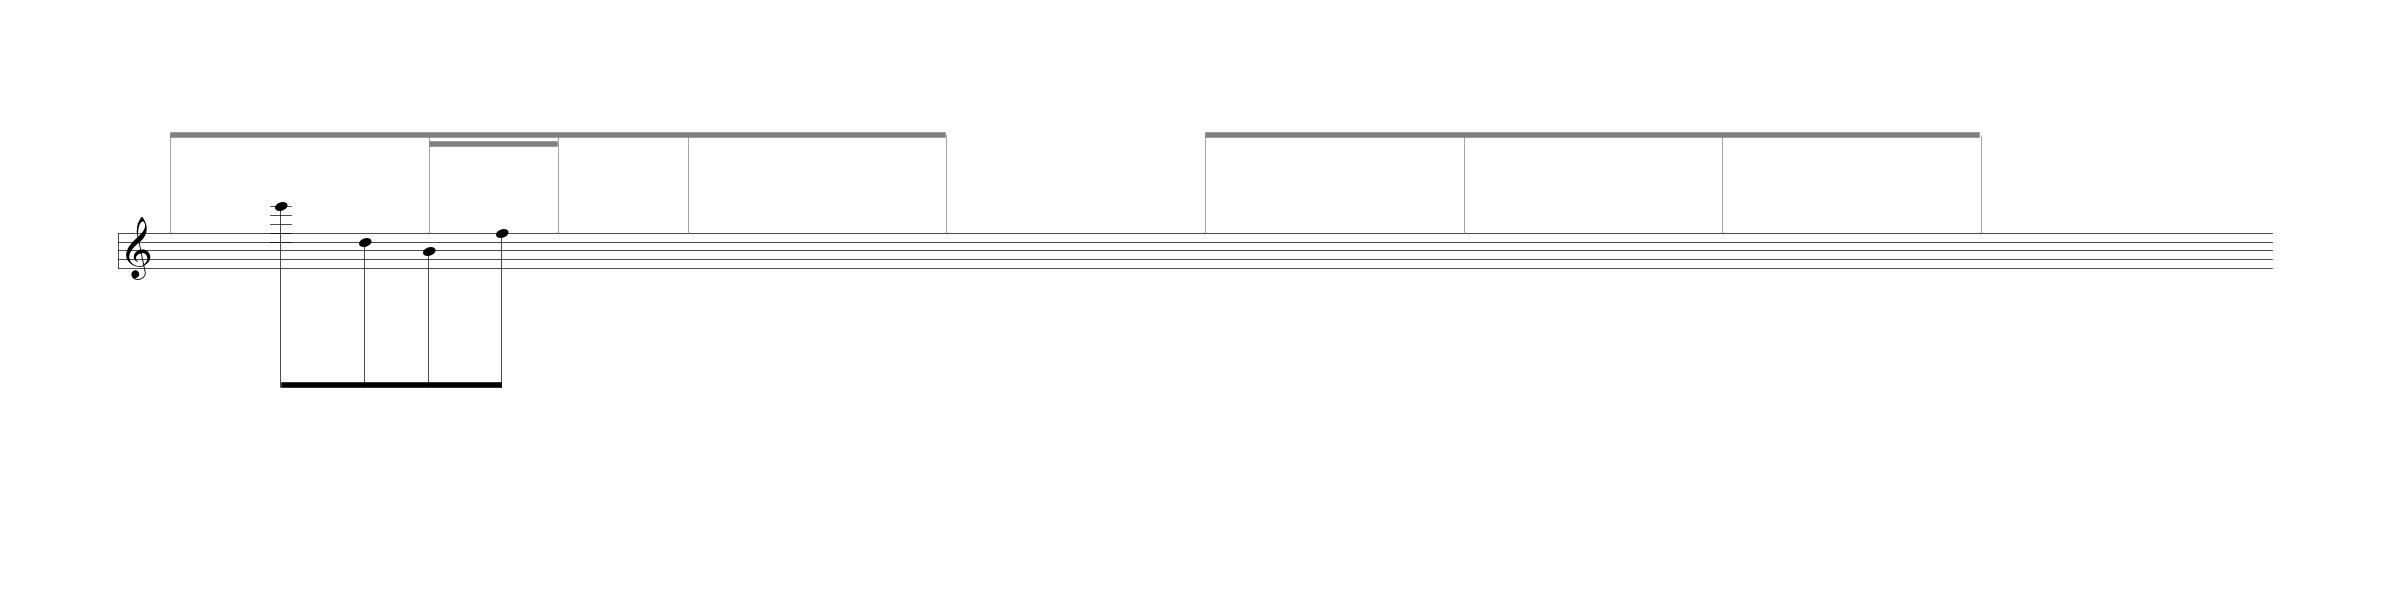

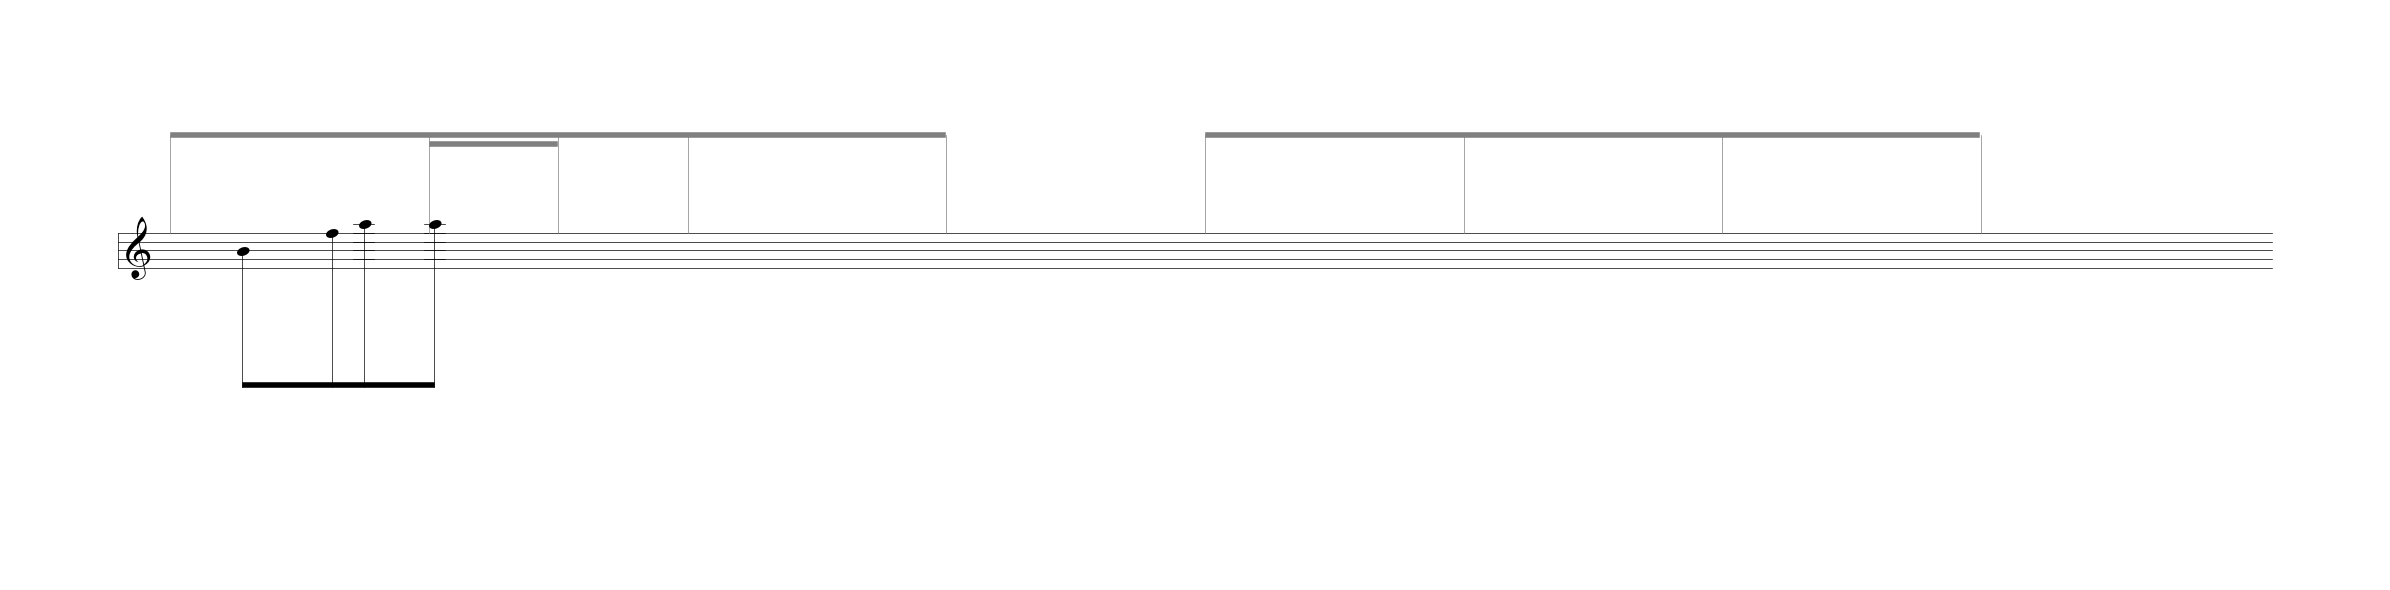

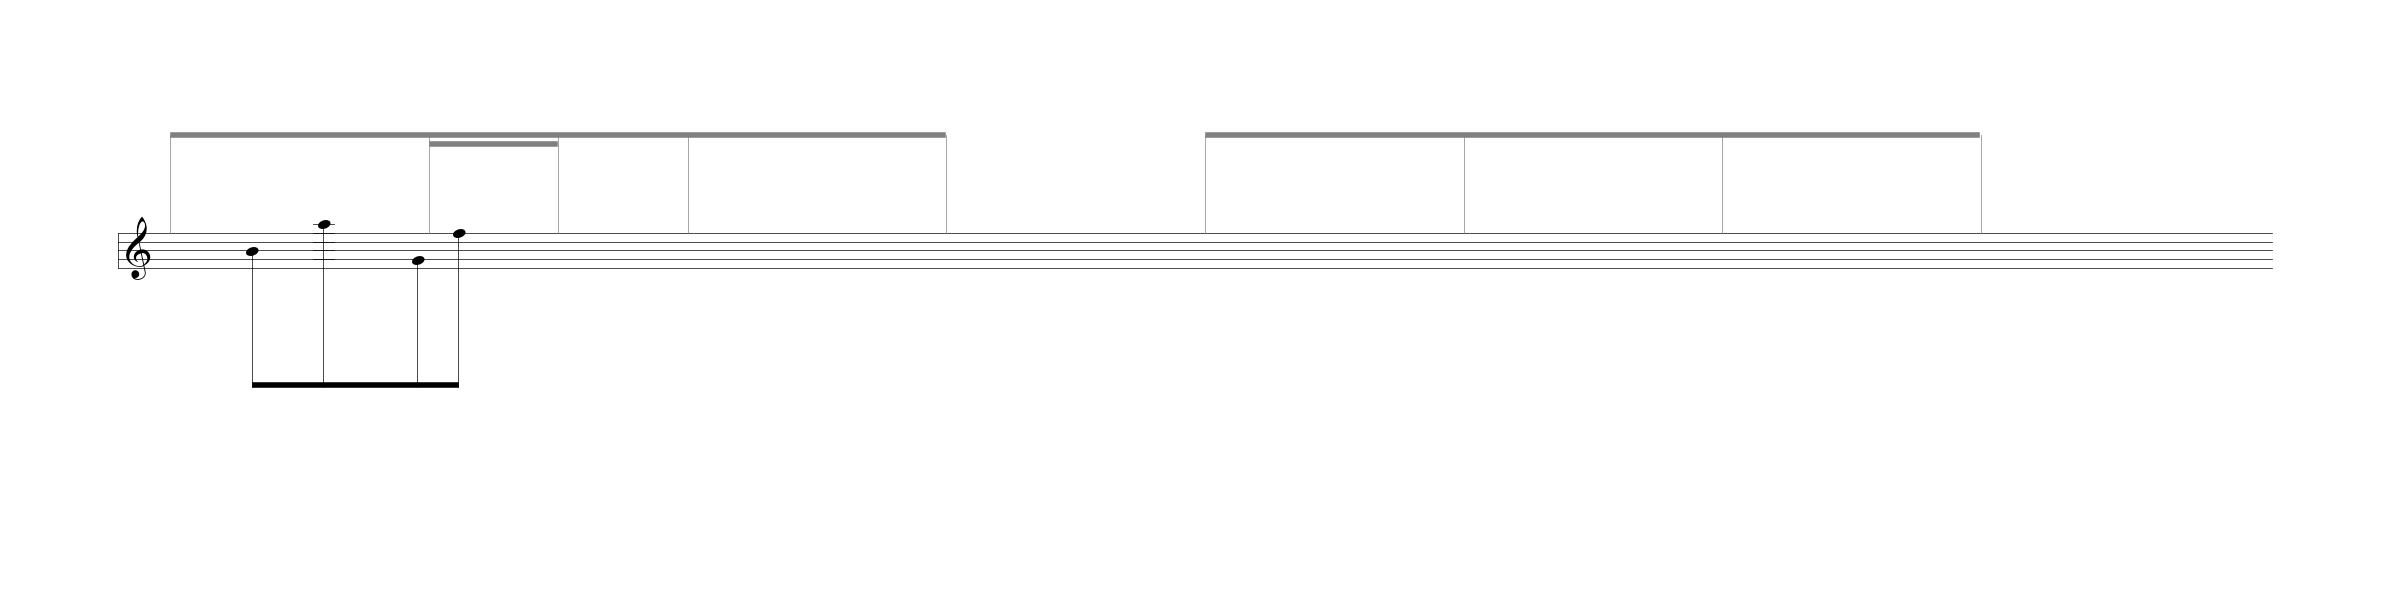

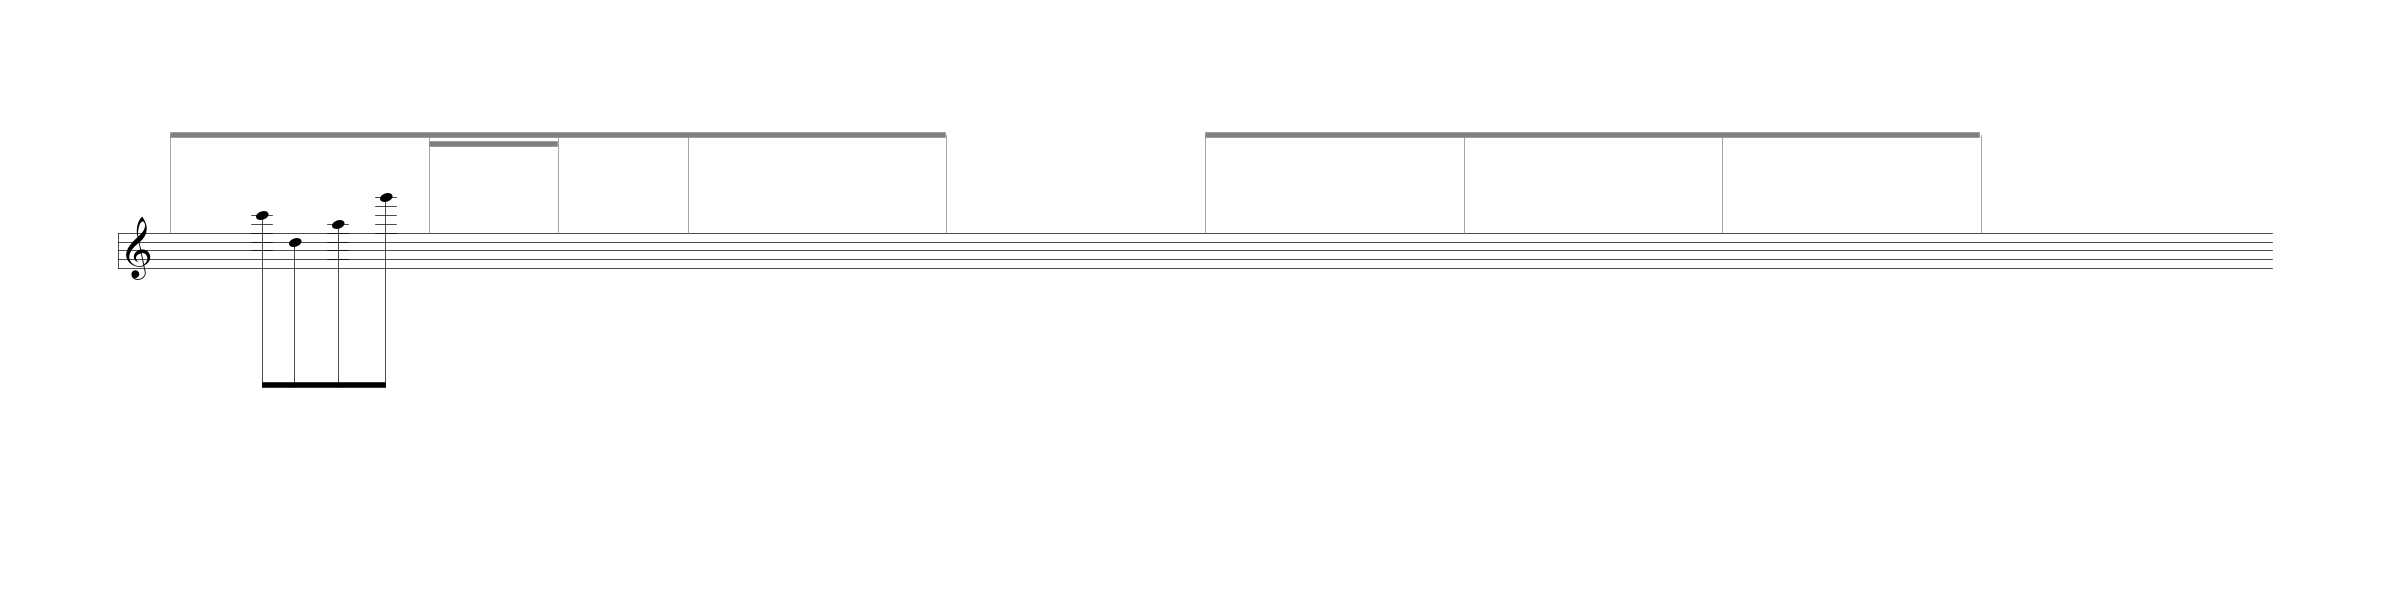

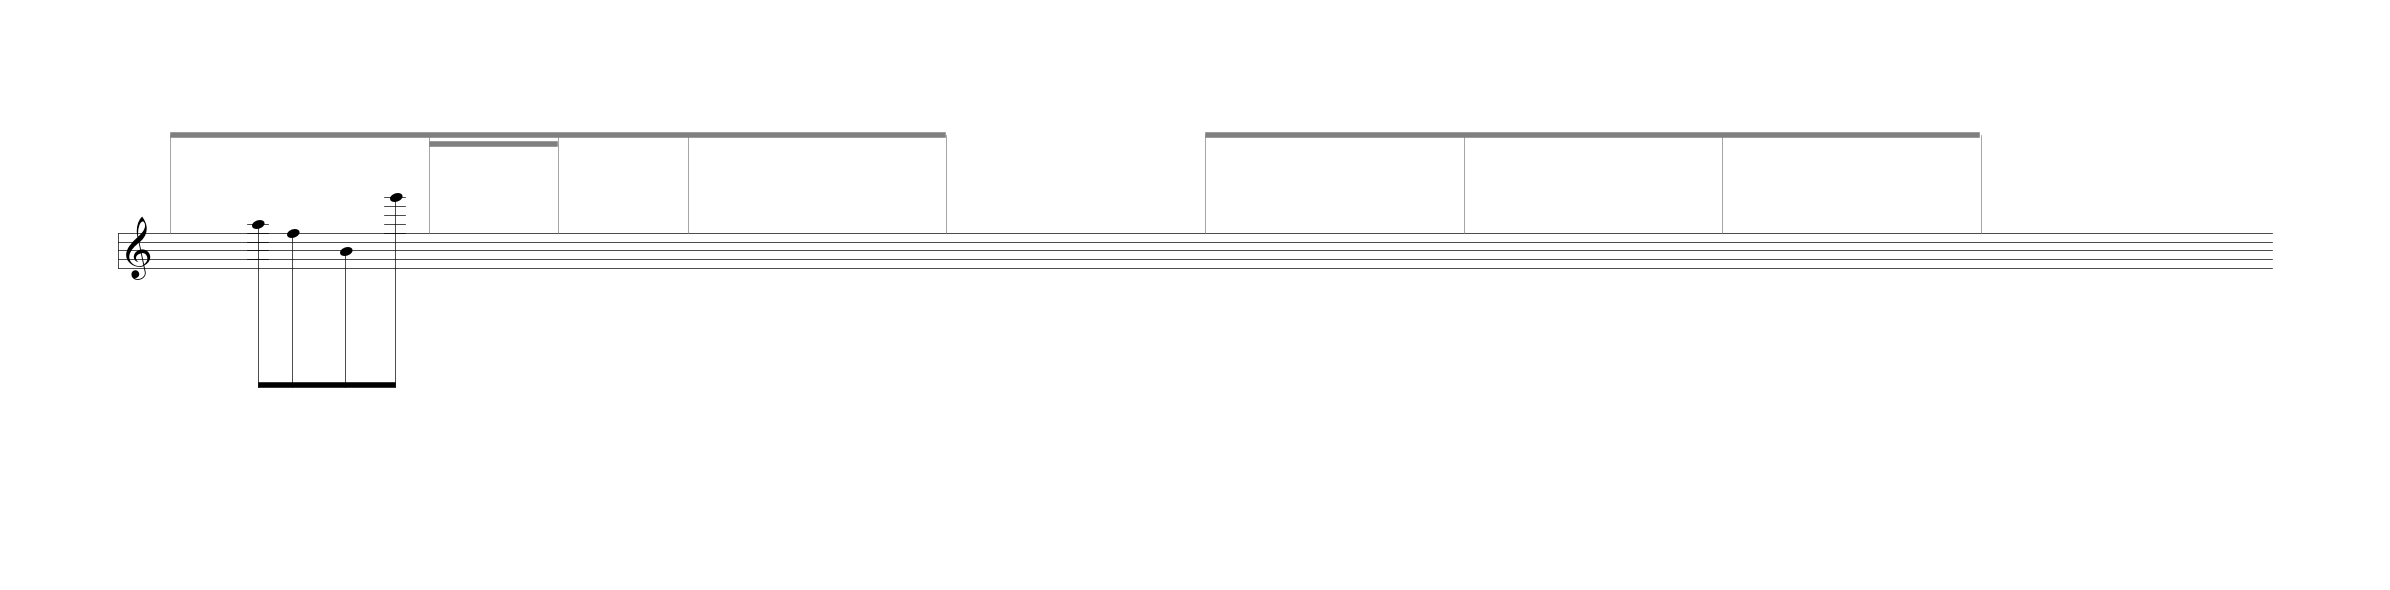

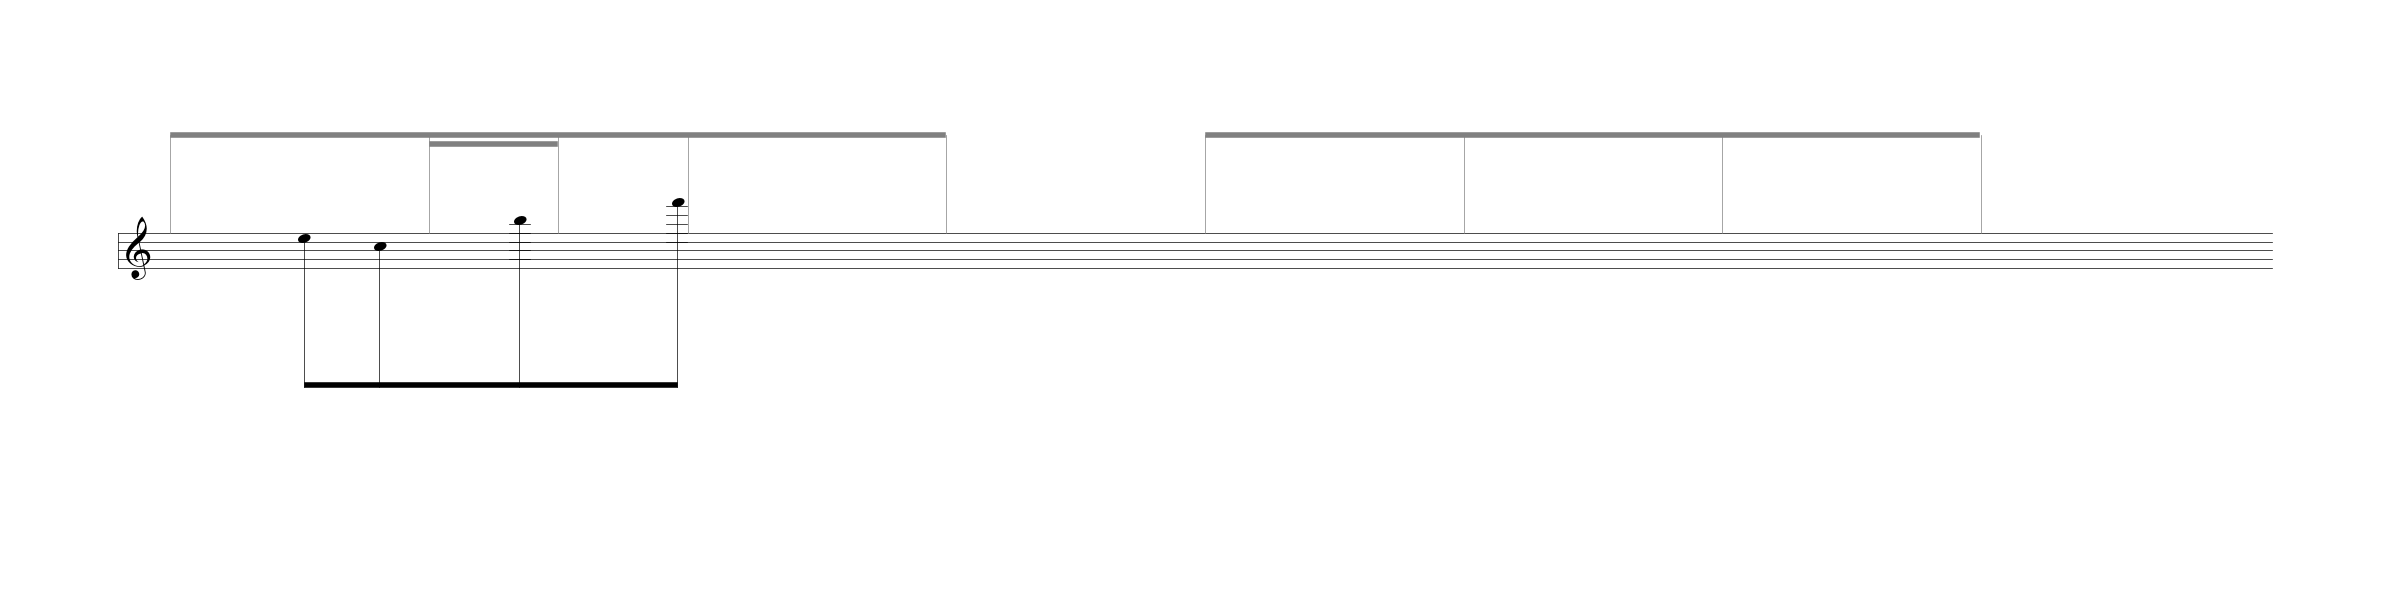

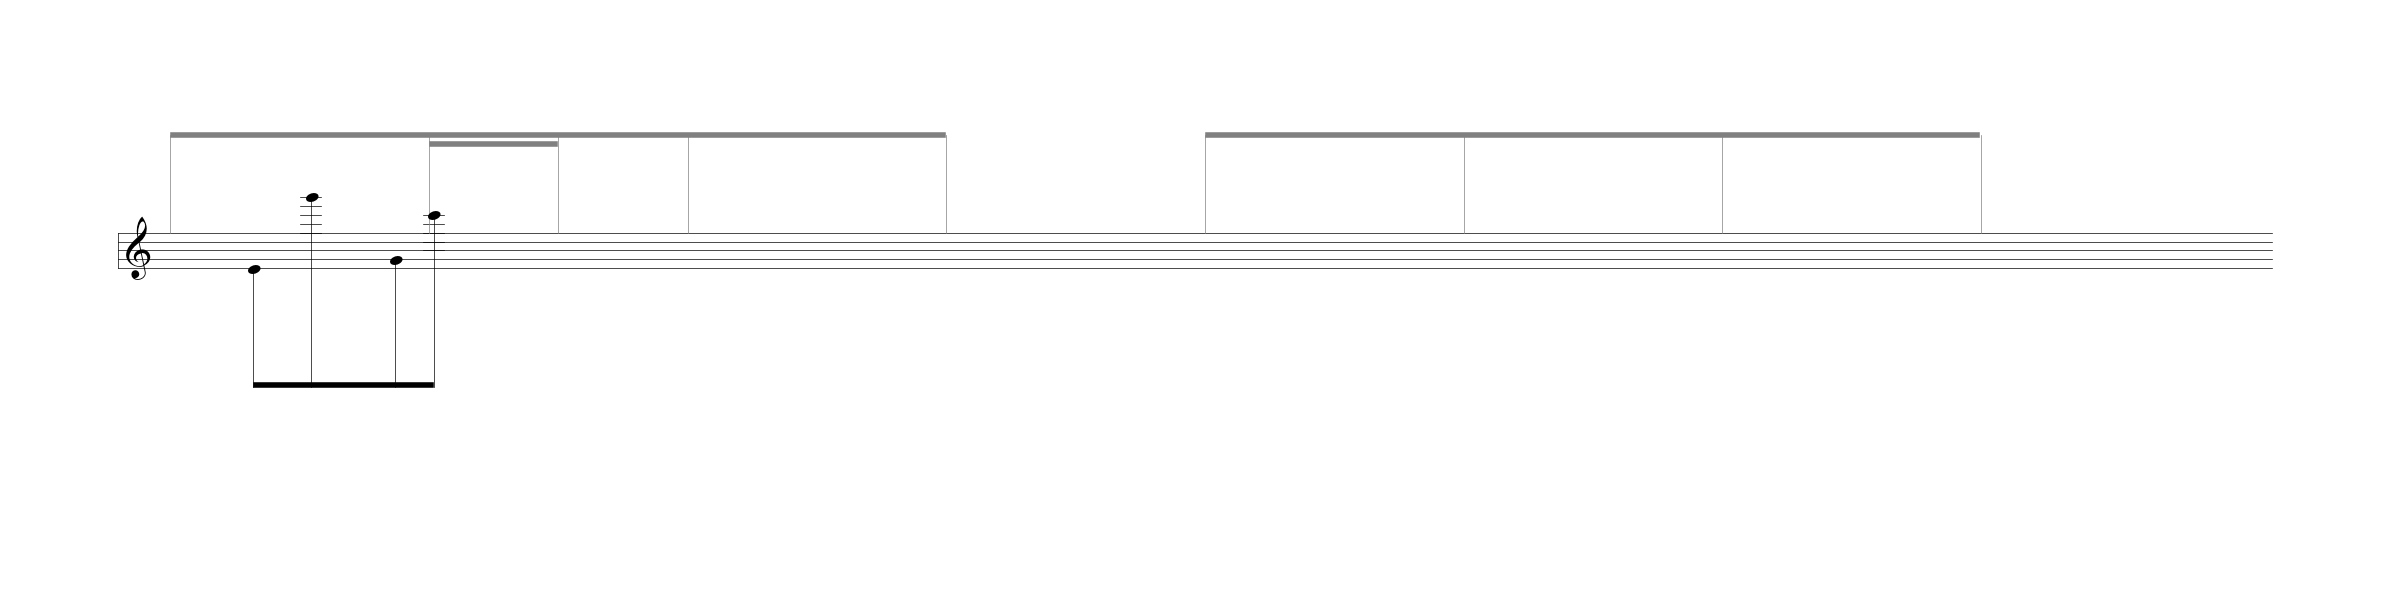

final_values: [None, [5.0, 0.5155679697637757], [5.0, 1.3831723844516581], [9.0, 1.4937984907928312], [4.0, 2.333530484537259], None, [10.5, 0.5671113848377946], [4.5, 1.1255291031063108], [11.5, 1.7841389626124289], [5.5, 2.0711098003315347], None, [10.5, 0.8114744066180365], [6.5, 1.209942887117903], [5.5, 1.5153243118303101], [7.5, 1.8658949119339887], None, [5.5, 0.6288499678958566], [7.5, 1.0555497426869263], [8.5, 1.2097671599350592], [8.5, 1.5467349098527956], None, [5.5, 0.6737945023849068], [8.5, 1.0160596083312252], [4.5, 1.4645504503575524], [7.5, 1.6611128715631422], None, [9.5, 0.7220984972703434], [6.5, 0.8780545726883914], [8.5, 1.0851138366358726], [11.5, 1.3125289084440914], None, [8.5, 0.7027853392773753], [7.5, 0.8658932202351757], [5.5, 1.119364008249796], [11.5, 1.3579522344962023], None, [7.0, 0.9220838319125271], [6.0, 1.2845494592370534], [9.0, 1.9524483207124814], [11.0, 2.7035772006197547], None, [3.5, 0.6810584881776776], [11.5, 0.9572407431382669], [4.5, 1.3

In [12]:
font_dirs = ["/content"]
font_files = fm.findSystemFonts(fontpaths=font_dirs)

fontprop2 = fm.FontProperties(fname=font_files[0], size=25)
fontprop1 = fm.FontProperties(fname=font_files[1], size=24)

# constants & variables
seed_value = 123
np.random.seed(seed_value)
final_values = []

# get the values 
for values in slider_values:
    speed_pred = round(values[0]/0.1) * 0.1
    size_pred = int(values[1]) 
    range_min_pred = int(values[2])
    range_max_pred = int(values[3])
    x_offset_pred = (round(values[4]/0.05) * 0.05) + 0.25
    y_offset_pred = round(values[5]/0.5) * 0.5
    rhythmic_irregularity_pred = round(values[6]/0.01) * 0.01

    # apply boundaries
    speed_pred = round(max(0.2, min(speed_pred, 2.0)),2)
    size_pred = max(2, min(size_pred, 12))
    range_min_pred = max(0, min(range_min_pred, 5))
    range_max_pred = max(6, min(range_max_pred, 12))
    x_offset_pred = round(max(0.25, min(x_offset_pred, 7.0)),2)
    y_offset_pred = round(max(-4.0, min(y_offset_pred, 4.0)),2)
    rhythmic_irregularity_pred = round(max(0.0, min(rhythmic_irregularity_pred, 0.2)),2)
    # to group accordingly
    final_values.append(None)

    phan_off = 0.25
    x_off = x_offset_pred
    y_off = 0.0

    # staff lines
    X_1, Y_1 = np.linspace(0.06, 10.345, 10), np.zeros(10) 
    # measure lines
    X_2, Y_2 = np.linspace(0.06, 0.06, 10), np.linspace(4, 0, 10)
    # phantoms
    phantoms = [1, 2, 2.5, 3, 4, 5, 6, 7, 8]

    # notes:
    noteheads = ['f']
    notes = []
    notes.append(noteheads[0])
    # arrays for data:
    rhy_map = []
    pi_map = []

    # dicts
    pitch_dict = {'E3': 0.0, 'F3': 0.5, 'G3': 1.0, 'A3': 1.5, 'B3': 2.0, 'C4': 2.5, 'D4': 3.0, 'E4': 3.5, 'F4': 4.0, 'G4': 4.5, 'A4': 5.0, 'B4': 5.5, 'C5': 6.0, 'D5': 6.5, 'E5': 7.0, 'F5': 7.5, 'G5': 8.0, 'A5': 8.5, 'B5': 9.0, 'C6': 9.5, 'D6': 10.0, 'E6': 10.5, 'F6': 11.0, 'G6': 11.5, 'A6': 12.0}
    # oct_dict = {0: 0, 12: 3.5, 24: 7, 36: 10.5}
    pha_dict = {1: phan_off, 2: 1.235 + phan_off, 2.5: (1.235 + 0.6175) + phan_off, 3: (1.235 * 2) + phan_off, 4: (1.235 * 3) + phan_off, 5: (1.235 * 4) + phan_off, 6: (1.235 * 5) + phan_off, 7: (1.235 * 6) + phan_off, 8: (1.235 * 7) + phan_off}


    ## input etc. TODO: dataset input option

    size = size_pred

    #raw_data = pd.read_csv("/content/src/pix.csv", converters={"0": int})
    #chars = raw_data["0"].values.tolist()

    # Generate random values
    range_slider_min = range_min_pred
    range_slider_max = range_max_pred
    raw_data = np.random.randint(low=range_slider_min, high=range_slider_max, size=size)

    ## Speed / rhythmic irregularity / textural direction

    speed = speed_pred
    mean = 0  
    std_dev = rhythmic_irregularity_pred

    x_data = list(range(size))

    # Add randomness 
    x_data = [x + np.random.normal(mean, std_dev) for x in x_data]
    x_data = [i*speed for i in x_data] 

    y_data = raw_data
  
    # perform mapping
    phan = [pha_dict[i] for i in phantoms] #do we need a dictionary for phantoms?
    # pitches = [pitch_dict[i] for i in y_data] 
    pitches = y_data


    """### Generate the notation"""

    import warnings

    # create the figure and subplot:
    fig = plt.figure(figsize=(24, 6))
    ax = plt.subplot(1, 1, 1)

    # customize the subplot spines
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)


    # plot the noteheads and stems:
    for i in range(size):
        pitch = pitches[i]+y_offset_pred
        rhythm = x_data[i]
        oct_add = 0
        pitch_offset = -3.55
        ledger_off_low = (pitch+pitch_offset)+0.55
        ledger_off_hi = (pitch+pitch_offset)-4.45
        
        # ledger lines
        L1_x, L1_y = np.linspace(rhythm+x_off+0.01, rhythm++x_off+0.11, 10), np.full((10, ), ledger_off_low)
        L2_x, L2_y = np.linspace(rhythm+x_off+0.01, rhythm++x_off+0.11, 10), np.full((10, ), ledger_off_hi)

        if pitch < 3.0 and (pitch % 1) == 0.0:
          for i in range(5):
            ax.plot(L1_x, L1_y + i, linestyle='solid', linewidth=0.5, color='black')
        elif pitch < 3.0 and (pitch % 1) != 0.0:
          for i in range(5):
            ax.plot(L1_x, L1_y-0.5 + i, linestyle='solid', linewidth=0.5, color='black')

        if pitch > 8.0 and (pitch % 1) == 0.0:
          for i in range(5):
            ax.plot(L2_x, L2_y + i, linestyle='solid', linewidth=0.5, color='black')
        elif pitch > 8.0 and (pitch % 1) != 0.0:
          for i in range(5):
            ax.plot(L2_x, L2_y+0.5 + i, linestyle='solid', linewidth=0.5, color='black')

        plt.text((rhythm + 0.035)+x_off, pitch+pitch_offset + oct_add, notes[0], fontproperties=fontprop2, color='black')
        ax.plot(np.linspace(rhythm+x_off + 0.06, rhythm+x_off + 0.06, 10), np.linspace((pitch+pitch_offset + oct_add), -13.3, 10), linestyle='solid', linewidth=0.5, color='black')
        # append the pitch and rhythm data
        final_values.append([pitch, (rhythm + 0.035)+x_off])

    # plot the staff lines
    for i in range(5):
        ax.plot(X_1, y_off + Y_1 + i, linestyle='solid', linewidth=0.5, color='black')

    # plot the treble clef
    plt.text(0.1, 1.1 + y_off, '&', fontproperties=fontprop1)

    # plot the measure lines and lower beams:
    ax.plot(X_2, Y_2, linestyle='solid', linewidth=0.5, color='black')
    ax.plot(np.linspace((x_data[0])+x_off + 0.075, (x_data[size-1])+x_off+ 0.05, 10), np.linspace(-13.1, -13.1, 10), linestyle='solid', linewidth=4, color='black')

    # phantom rhythms:
    for i in range(2):
        ax.plot(np.linspace(phan[i] + 0.06, phan[i] + 0.06, 10), np.linspace(4 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=0.5, color='gray')
    for i in range(1):
        ax.plot(np.linspace(phan[i + 2] + 0.06, phan[i + 2] + 0.06, 10), np.linspace(4 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=0.5, color='gray')
    for i in range(2):
        ax.plot(np.linspace(phan[i + 3] + 0.06, phan[i + 3] + 0.06, 10), np.linspace(4 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=0.5, color='gray')
    for i in range(1):
        ax.plot(np.linspace(phan[i + 5] + 0.06, phan[i + 5] + 0.06, 10), np.linspace(4 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=0.5, color='gray')
    for i in range(1):
        ax.plot(np.linspace(phan[i + 6] + 0.06, phan[i + 6] + 0.06, 10), np.linspace(4 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=0.5, color='gray')
    for i in range(2):
        ax.plot(np.linspace(phan[i + 7] + 0.06, phan[i + 7] + 0.06, 10), np.linspace(4 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=0.5, color='gray')

    ax.plot(np.linspace((phan[0]) + 0.075, (phan[4]) + 0.045, 10), np.linspace(15 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=4, color='gray')
    ax.plot(np.linspace((phan[1]) + 0.075, (phan[2]) + 0.045, 10), np.linspace(14 + y_off, 14 + y_off, 10), linestyle='solid', linewidth=4, color='gray')
    ax.plot(np.linspace((phan[5]) + 0.075, (phan[8]) + 0.04, 10), np.linspace(15 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=4, color='gray')

    # set the y-axis limits, adjust layout, and display the plot:
    warnings.filterwarnings("ignore", category=UserWarning)

    ax.set_ylim(-35, 29)
    fig.set_tight_layout(True)
    plt.yticks([])
    plt.xticks([])

    # save if you want
    filename = f'notation_{fig_num}.jpg'
    plt.savefig(filename, format='jpg')
    fig_num += 1

    plt.show()

print('final_values:', final_values)



In [13]:
# put the pitch and rhythm information into groups
pitch_rhythm = []
current_group = []

for value in final_values:
    if value is None:
        if current_group:
            pitch_rhythm.append(current_group)
            current_group = []
    else:
        current_group.append(value)

if current_group:
    pitch_rhythm.append(current_group)

print(pitch_rhythm)

[[[5.0, 0.5155679697637757], [5.0, 1.3831723844516581], [9.0, 1.4937984907928312], [4.0, 2.333530484537259]], [[10.5, 0.5671113848377946], [4.5, 1.1255291031063108], [11.5, 1.7841389626124289], [5.5, 2.0711098003315347]], [[10.5, 0.8114744066180365], [6.5, 1.209942887117903], [5.5, 1.5153243118303101], [7.5, 1.8658949119339887]], [[5.5, 0.6288499678958566], [7.5, 1.0555497426869263], [8.5, 1.2097671599350592], [8.5, 1.5467349098527956]], [[5.5, 0.6737945023849068], [8.5, 1.0160596083312252], [4.5, 1.4645504503575524], [7.5, 1.6611128715631422]], [[9.5, 0.7220984972703434], [6.5, 0.8780545726883914], [8.5, 1.0851138366358726], [11.5, 1.3125289084440914]], [[8.5, 0.7027853392773753], [7.5, 0.8658932202351757], [5.5, 1.119364008249796], [11.5, 1.3579522344962023]], [[7.0, 0.9220838319125271], [6.0, 1.2845494592370534], [9.0, 1.9524483207124814], [11.0, 2.7035772006197547]], [[3.5, 0.6810584881776776], [11.5, 0.9572407431382669], [4.5, 1.359527561265557], [9.5, 1.542665461406131]]]


In [14]:
# Write the updated data to the file
with open("pitch_rhythm.json", "w") as file:
  json.dump(pitch_rhythm, file, indent=4)

In [15]:
# path to the source file
source_file_path = '/content/pitch_rhythm.json'
# destination directory in Google Drive
destination_directory = '/content/drive/MyDrive'

shutil.copy(source_file_path, destination_directory)

'/content/drive/MyDrive/pitch_rhythm.json'